# Predicting Breast Cancer Survival Period and Recommending Treatments

**Team:**
* Fady Smouni
* Rishu Gandhi

**Course:** DAAN 888 – Design and Implementation of Analytics System (Fall, 2021).                   
**Supervisor:** Robin Qiu, Ph.D.

### Project Objectives
* We aim to perform classification based on various parameters to determine a survival range for the patient.
* We would also like to try and perform a regression analysis to see If it is possible to predict how long a patient will survive in months.
* Try to explore the use of Bayesian Networks in the understanding which treatment(s) could most likely prolong breast cancer patients’ survival time at their different survival periods based on a survival causal analysis.
    

### Project Importance and Impacts
Research shows that breast cancer can affect 1 in 8 U.S. women. That is why it is important to do everything we can to add value to the immense research that is done to fight this disease. Significant progress has been achieved over the past decades, bringing survival rates higher and allowing patients to live longer. Through our research, we aim to use deep neural networks to help drive this progress further by providing a clearer picture of patient survival and potentially start a conversation about life extension in relation to the various available treatments.

**Keywords:** Breast Cancer, Survival Chance, Patient, Deep Neural Network
	

### Dataset
* Data Access Source(url): https://seer.cancer.gov/data/access.html

* Short Description : The data was collected from Surveillance, Epidemiology, and End Results (SEER) program trough the National Institute of Health (NIH). It comprises information about the patient such as age and race. It also provides an extensive list of medical parameters of which tumor information, surgery information, and vital status. The original text dataset that is available for download has 840666 records.
* This dataset plays a major role in our goal to predict Breast Cancer survivability using various medical and demographical parameters. We are able to use this labeled data to train our model to discern between individuals that survived more 6 years or less and individuals that survived more than 6 years.


**Keywords:** Breast Cancer, NIH, SEER.

# Classification Problem

* Deep Neural Networks.

### Required packages

* Please make sure you install any of the following packages that you are missing.


In [2]:
## Your code begins here

# Remove the "#" for the packages you are missing
#!pip install matplotlib
#!pip install tensorflow
#!pip install pandas
#!pip install numpy
#!pip install sklearn
#!pip install causalnex --user
#!pip install xgboost

In [28]:
# Import all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import statsmodels.api as sm
import causalnex
physical_devices = tf.config.list_physical_devices('GPU')                  # This is a necessary configuration to avoid
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True) # any memory errors when running the RNN model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding, LSTM
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from causalnex.structure.notears import from_pandas
from causalnex.structure import StructureModel
from sklearn.model_selection import train_test_split
from causalnex.inference import InferenceEngine
from causalnex.network import BayesianNetwork
from causalnex.evaluation import roc_auc
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Data Cleaning and Preprocessing


In [3]:
# We start by reading the extracted csv file that has all the variables deemed necessary to answer our question.
cancer_data = pd.read_csv('breast_cancer_completeV1.csv')

# We drop any rows with no values
cancer_data.dropna(inplace=True)

#removing male gender because negligeable representation
cancer_data.drop(cancer_data[cancer_data['SEX'] == 1].index, inplace = True)
#removing sex column because only 1 value there now
cancer_data = cancer_data.drop(['SEX'], axis='columns')

#reformate no_surg column to boolean or surgery (0) or no surgery (1)
cancer_data["NO_SURG"].replace({1: 1, 2: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, inplace=True)

#drop rows with unkown age =99 and drop under 30 
cancer_data.drop(cancer_data[cancer_data['AGE_1REC'] < 7].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['AGE_1REC'] == 99].index, inplace = True)

#combine other group for rac_reca and add unkown to other
cancer_data["RAC_RECA"].replace({7: 2, 9: 2, 3: 2}, inplace=True)

#combine marital stauts to has a partner or single
cancer_data.drop(cancer_data[cancer_data['MAR_STAT'] == 9].index, inplace = True)
cancer_data["MAR_STAT"].replace({3: 1, 4: 1, 5: 1, 6: 2}, inplace=True)

#get rid of any rows that are not alive or dead because of breast cancer
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50300].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50130].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 27030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50080].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50160].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50050].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 37000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 22030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 27040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50210].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50051].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50120].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21100].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35021].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50100].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50150].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21050].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 31010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 29020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21130].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 23000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50070].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 29010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 27010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 38000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 32020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 34000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21080].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 41000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 33040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 22020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21072].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 29030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50220].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35011].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50200].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50180].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 33010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 30000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 25010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 20050].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50140].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21071].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50170].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 24000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35043].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 27070].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 27050].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 27060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35012].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21110].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35031].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35023].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 25020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 20070].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35013].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 29040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 20030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 20080].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 28010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 20040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50190].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21120].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50230].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21090].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 27020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 21010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 20060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35022].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 20100].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 32010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 22010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50110].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 20020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 35041].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 50090].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUB'] == 22060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50300].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50130].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 27030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50080].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50160].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50050].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 37000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 22030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 27040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50210].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50051].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50120].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21100].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35021].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50100].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50150].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21050].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 31010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 29020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21130].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 23000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50070].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 29010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 27010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 38000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 32020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 34000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21080].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 41000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 33040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 22020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21072].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 29030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50220].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35011].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50200].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50180].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 33010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 30000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 25010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 20050].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50140].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21071].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50170].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 24000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35043].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 27070].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 27050].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 27060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35012].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21110].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35031].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35023].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 25020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 20070].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35013].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 29040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 20030].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 20080].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 28010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 20040].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50190].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21120].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50230].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21090].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 27020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 21010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 20060].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35022].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 20100].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 32010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 22010].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50110].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50000].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 20020].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 35041].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 50090].index, inplace = True)
cancer_data.drop(cancer_data[cancer_data['CODPUBKM'] == 22060].index, inplace = True)
cancer_data = cancer_data.drop(['CODPUB'], axis='columns')
cancer_data = cancer_data.drop(['CODPUBKM'], axis='columns')

#drop unkown survival time
cancer_data.drop(cancer_data[cancer_data['SRV_TIME_MON'] == 9999].index, inplace = True)

#group insured and insured/no specifics
cancer_data["INSREC_PUB"].replace({4: 3}, inplace=True)

#get rid of rows with unkown stage in ADJAJCCSTG
cancer_data.drop(cancer_data[cancer_data['ADJAJCCSTG'] == 99].index, inplace = True)

#get rid of rows with unkown tumor counts MALIGCOUNT
cancer_data.drop(cancer_data[cancer_data['MALIGCOUNT'] == 99].index, inplace = True)

#set the conditions for the binary split and perform the split
conditions = [(cancer_data['SRV_TIME_MON'] < 73), (cancer_data['SRV_TIME_MON'] > 72)]
choices = ['0', '1']
cancer_data['Survival_category'] = np.select(conditions, choices, default="N/A")

#drop the survival time in months as it is no longer relevant
cancer_data = cancer_data.drop(['SRV_TIME_MON'], axis='columns')

#displaying part of the dataframe if further investigation is necessary by uncommenting the line of code below
#cancer_data

#create dummy variables for the categorical variables
dummies = pd.get_dummies(cancer_data, columns = ['MAR_STAT', 'SEQ_NUM', 'PRIMSITE', 'LATERAL', 'GRADE', 'SURGPRIF', 'SURGSITF', 
                                                'NO_SURG', 
                                                'AGE_1REC', 'BEHTREND', 'RAC_RECA', 'STAT_REC', 'ERSTATUS',
                                                'PRSTATUS', 'INSREC_PUB', 'ADJTM_6VALUE', 'ADJNM_6VALUE', 'ADJM_6VALUE', 
                                                'ADJAJCCSTG', 'her2', 'brst_sub', 'MALIGCOUNT', 'BENBORDCOUNT',
                                                'RADIATION','RAD_SURG_SEQ','CHEMO'])

#final dataframe
cancer_data_final = dummies

# Initialize data and labels
data = []
labels = []

#split into labels and data
data = cancer_data_final.drop(['Survival_category'], axis='columns')
labels= cancer_data_final["Survival_category"]

#create an array of both the data and labels
#no scalling is necessary for any of the variables as we are using binary representation for all of them
#data_array
data_array = np.array(data)
#labels_array
labels_array = np.array(labels)

#reshape the data_array to meet the input requirement for the RNN model
data_array_resh = data_array.reshape(208517, 197, 1)

In [4]:
# Preparation for models
# We first need to split our dataset into training, validation, and testing
# 80% for training, 20% for testing, and 10% of the training data for validation
(trainX, testX, trainY, testY) = train_test_split(data_array_resh, labels_array, test_size=0.20, random_state=73)
(trainX, validationX, trainY, validationY) = train_test_split(trainX, trainY, test_size=0.10, random_state=55)

# We use LabelBinarizer to convert the labels into vectors so that we can use them in our models
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)
validationY = lb.fit_transform(validationY)

#We also set up our inputshape to only have to change it once if that is necessary in the future.
input_shape = (197, 1)

In [7]:
# We run a 5-fold cross validation to make sure our model performs well over the entire dataset. This also allows us to later
#train it on the entire dataset.

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

cvscores = []
for train, test in kfold.split(data_array_resh, labels_array):

    model = Sequential()
    model.add(LSTM(units = 64, return_sequences = True, input_shape = input_shape))
    model.add(Activation("relu"))
    model.add(Dropout(0.1))
    model.add(LSTM(units = 32, input_shape = input_shape))
    model.add(Activation("relu"))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    epochs = 100
    bs = 100
    opt = Adam(learning_rate=0.0001)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

    model.fit(data_array_resh[train], lb.fit_transform(labels_array[train]), epochs = epochs, batch_size = bs)
    # evaluate the model
    scores = model.evaluate(data_array_resh[test], lb.fit_transform(labels_array[test]), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/100
1669/1669 [==============================] - 42s 23ms/step - loss: 0.6448 - accuracy: 0.6582
Epoch 2/100
1669/1669 [==============================] - 40s 24ms/step - loss: 0.6423 - accuracy: 0.6590
Epoch 3/100
1669/1669 [==============================] - 41s 24ms/step - loss: 0.6424 - accuracy: 0.6590
Epoch 4/100
1669/1669 [==============================] - 40s 24ms/step - loss: 0.6423 - accuracy: 0.6590
Epoch 5/100
1669/1669 [==============================] - 54s 32ms/step - loss: 0.6422 - accuracy: 0.6590
Epoch 6/100
1669/1669 [==============================] - 40s 24ms/step - loss: 0.6423 - accuracy: 0.6590
Epoch 7/100
1669/1669 [==============================] - 40s 24ms/step - loss: 0.5076 - accuracy: 0.7680
Epoch 8/100
1669/1669 [==============================] - 41s 25ms/step - loss: 0.3602 - accuracy: 0.8824
Epoch 9/100
1669/1669 [==============================] - 45s 27ms/step - loss: 0.3573 - accuracy: 0.8839
Epoch 10/100
1669/1669 [==============================]

1669/1669 [==============================] - 39s 23ms/step - loss: 0.3089 - accuracy: 0.9021
Epoch 54/100
1669/1669 [==============================] - 39s 23ms/step - loss: 0.3090 - accuracy: 0.9022
Epoch 55/100
1669/1669 [==============================] - 39s 23ms/step - loss: 0.3091 - accuracy: 0.9021
Epoch 56/100
1669/1669 [==============================] - 39s 23ms/step - loss: 0.3088 - accuracy: 0.9020
Epoch 57/100
1669/1669 [==============================] - 40s 24ms/step - loss: 0.3082 - accuracy: 0.9023
Epoch 58/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3086 - accuracy: 0.9021
Epoch 59/100
1669/1669 [==============================] - 40s 24ms/step - loss: 0.3086 - accuracy: 0.9020
Epoch 60/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3076 - accuracy: 0.9023
Epoch 61/100
1669/1669 [==============================] - 40s 24ms/step - loss: 0.3080 - accuracy: 0.90222s - los
Epoch 62/100
1669/1669 [===========================

1669/1669 [==============================] - 39s 23ms/step - loss: 0.3859 - accuracy: 0.8642
Epoch 5/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3638 - accuracy: 0.87810s - loss: 0.3638 - 
Epoch 6/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3597 - accuracy: 0.8807
Epoch 7/100
1669/1669 [==============================] - 39s 24ms/step - loss: 0.3567 - accuracy: 0.8824
Epoch 8/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3545 - accuracy: 0.8842
Epoch 9/100
1669/1669 [==============================] - 39s 23ms/step - loss: 0.3532 - accuracy: 0.8852TA: 0s - loss: 0.3532 - accuracy: 0.
Epoch 10/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3517 - accuracy: 0.8858
Epoch 11/100
1669/1669 [==============================] - 40s 24ms/step - loss: 0.3509 - accuracy: 0.88610s - los
Epoch 12/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3499 - accuracy: 0.8864


1669/1669 [==============================] - 38s 23ms/step - loss: 0.3426 - accuracy: 0.8879
Epoch 55/100
1669/1669 [==============================] - 39s 23ms/step - loss: 0.3467 - accuracy: 0.8852
Epoch 56/100
1669/1669 [==============================] - 39s 23ms/step - loss: 0.3420 - accuracy: 0.8881
Epoch 57/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3418 - accuracy: 0.8881
Epoch 58/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3423 - accuracy: 0.8881
Epoch 59/100
1669/1669 [==============================] - 39s 23ms/step - loss: 0.3416 - accuracy: 0.8881
Epoch 60/100
1669/1669 [==============================] - 39s 23ms/step - loss: 0.3419 - accuracy: 0.8882
Epoch 61/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3410 - accuracy: 0.8886
Epoch 62/100
1669/1669 [==============================] - 38s 23ms/step - loss: 0.3410 - accuracy: 0.8883
Epoch 63/100
1669/1669 [==============================] - 3

In [26]:
#We run the below split to be able to have graphical model evaluation.

#RNN Model
model = Sequential()
model.add(LSTM(units = 64, return_sequences = True, input_shape = input_shape))
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(LSTM(units = 32, input_shape = input_shape))
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation("sigmoid"))

# Compile and Fit RNN Model
# We set up our batch size and epochs to train for
epochs = 100
bs = 100
# We set our optimzer of choice and compile our model.
opt = Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# We Train the network
history = model.fit(trainX, trainY, epochs = epochs, batch_size = bs, validation_data=(validationX, validationY))

Epoch 1/100
1502/1502 [==============================] - 38s 24ms/step - loss: 0.6451 - accuracy: 0.6581 - val_loss: 0.6428 - val_accuracy: 0.6577
Epoch 2/100
1502/1502 [==============================] - 37s 25ms/step - loss: 0.6426 - accuracy: 0.6587 - val_loss: 0.6424 - val_accuracy: 0.6577
Epoch 3/100
1502/1502 [==============================] - 40s 26ms/step - loss: 0.4604 - accuracy: 0.8037 - val_loss: 0.3617 - val_accuracy: 0.8797
Epoch 4/100
1502/1502 [==============================] - 36s 24ms/step - loss: 0.3766 - accuracy: 0.8683 - val_loss: 0.3537 - val_accuracy: 0.8808
Epoch 5/100
1502/1502 [==============================] - 39s 26ms/step - loss: 0.3654 - accuracy: 0.8767 - val_loss: 0.3440 - val_accuracy: 0.8871
Epoch 6/100
1502/1502 [==============================] - 41s 27ms/step - loss: 0.3598 - accuracy: 0.8801 - val_loss: 0.3438 - val_accuracy: 0.8886
Epoch 7/100
1502/1502 [==============================] - 36s 24ms/step - loss: 0.3563 - accuracy: 0.8825 - val_loss: 0

In [12]:
# We finally train the model on the entire dataset as we know it performs well no matter which fold was used.
# This allows us to have 20% more data to train on.

#RNN Model entire dataset training
model_final = Sequential()
model_final.add(LSTM(units = 64, return_sequences = True, input_shape = input_shape))
model_final.add(Activation("relu"))
model_final.add(Dropout(0.1))
model_final.add(LSTM(units = 32, input_shape = input_shape))
model_final.add(Activation("relu"))
model_final.add(Dropout(0.1))
model_final.add(Dense(1))
model_final.add(Activation("sigmoid"))

# Compile and Fit RNN Model
# We set up our batch size and epochs to train for
epochs = 100
bs = 100
# We set our optimzer of choice and compile our model.
opt = Adam(learning_rate=0.0001)
model_final.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# We Train the network
history = model_final.fit(data_array_resh, lb.fit_transform(labels_array), epochs = epochs, batch_size = bs)
# Save the model
model_final.save("RNN_model_Final", save_format="h5")

Epoch 1/100
2086/2086 [==============================] - 51s 24ms/step - loss: 0.6442 - accuracy: 0.6590
Epoch 2/100
2086/2086 [==============================] - 51s 24ms/step - loss: 0.6425 - accuracy: 0.6590
Epoch 3/100
2086/2086 [==============================] - 51s 24ms/step - loss: 0.6390 - accuracy: 0.6598
Epoch 4/100
2086/2086 [==============================] - 49s 24ms/step - loss: 0.3899 - accuracy: 0.8651
Epoch 5/100
2086/2086 [==============================] - 49s 23ms/step - loss: 0.3622 - accuracy: 0.8796
Epoch 6/100
2086/2086 [==============================] - 48s 23ms/step - loss: 0.3580 - accuracy: 0.8814
Epoch 7/100
2086/2086 [==============================] - 49s 23ms/step - loss: 0.3549 - accuracy: 0.8825
Epoch 8/100
2086/2086 [==============================] - 49s 23ms/step - loss: 0.3524 - accuracy: 0.88400s - loss: 0.3524 - accuracy: 0.88
Epoch 9/100
2086/2086 [==============================] - 49s 23ms/step - loss: 0.3520 - accuracy: 0.8836
Epoch 10/100
2086/208

### Model Evaluation 

* To evaluate our models, we use a combination of accuracy charts, precision, and recall.

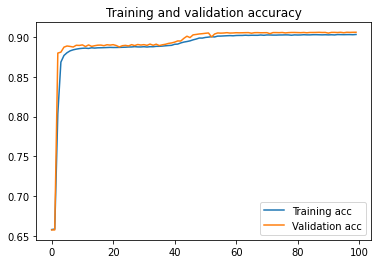

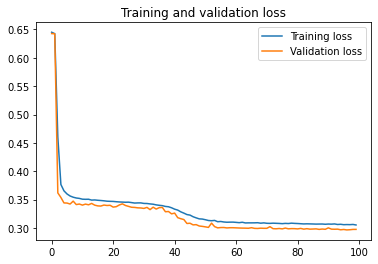

              precision    recall  f1-score   support

  <= 6 years       0.88      0.99      0.93     27545
   > 6 years       0.96      0.74      0.84     14159

    accuracy                           0.90     41704
   macro avg       0.92      0.86      0.88     41704
weighted avg       0.91      0.90      0.90     41704



In [27]:
# RNN Model Evaluation
# Plot the training and validation accuracy and loss
epochs = 100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Prediction on test dataset Accuracy using classification_report
predictions = (model.predict(testX) > 0.5).astype("int32")
print(classification_report(testY, predictions, target_names = ['<= 6 years','> 6 years']))

# Regression

In [30]:
# We start by reading the extracted csv file that has all the variables deemed necessary to answer our question.
cancer_data_regression = pd.read_csv('breast_cancer_completeV1.csv')

# We drop any rows with no values
cancer_data_regression.dropna(inplace=True)

#removing male gender because negligeable representation
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['SEX'] == 1].index, inplace = True)
#removing sex column because only 1 value there now
cancer_data_regression = cancer_data_regression.drop(['SEX'], axis='columns')

#reformate no_surg column to boolean or surgery (0) or no surgery (1)
cancer_data_regression["NO_SURG"].replace({1: 1, 2: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, inplace=True)

#drop rows with unkown age =99 and drop under 30 
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['AGE_1REC'] < 7].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['AGE_1REC'] == 99].index, inplace = True)

#combine other group for rac_reca and add unkown to other
cancer_data_regression["RAC_RECA"].replace({7: 2, 9: 2, 3: 2}, inplace=True)

#combine marital stauts to has a partner or single
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['MAR_STAT'] == 9].index, inplace = True)
cancer_data_regression["MAR_STAT"].replace({3: 1, 4: 1, 5: 1, 6: 2}, inplace=True)

#get rid of any rows that are not alive or dead because of breast cancer
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50300].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50130].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 27030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50080].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50160].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50050].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 37000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 22030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 27040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50210].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50051].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50120].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21100].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35021].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50100].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50150].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21050].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 31010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 29020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21130].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 23000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50070].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 29010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 27010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 38000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 32020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 34000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21080].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 41000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 33040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 22020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21072].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 29030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50220].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35011].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50200].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50180].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 33010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 30000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 25010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 20050].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50140].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21071].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50170].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 24000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35043].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 27070].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 27050].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 27060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35012].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21110].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35031].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35023].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 25020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 20070].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35013].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 29040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 20030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 20080].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 28010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 20040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50190].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21120].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50230].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21090].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 27020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 21010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 20060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35022].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 20100].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 32010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 22010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50110].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 20020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 35041].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 50090].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUB'] == 22060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50300].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50130].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 27030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50080].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50160].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50050].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 37000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 22030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 27040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50210].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50051].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50120].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21100].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35021].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50100].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50150].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21050].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 31010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 29020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21130].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 23000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50070].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 29010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 27010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 38000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 32020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 34000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21080].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 41000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 33040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 22020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21072].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 29030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50220].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35011].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50200].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50180].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 33010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 30000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 25010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 20050].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50140].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21071].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50170].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 24000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35043].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 27070].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 27050].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 27060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35012].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21110].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35031].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35023].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 25020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 20070].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35013].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 29040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 20030].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 20080].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 28010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 20040].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50190].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21120].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50230].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21090].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 27020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 21010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 20060].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35022].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 20100].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 32010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 22010].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50110].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50000].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 20020].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 35041].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 50090].index, inplace = True)
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['CODPUBKM'] == 22060].index, inplace = True)
cancer_data_regression = cancer_data_regression.drop(['CODPUB'], axis='columns')
cancer_data_regression = cancer_data_regression.drop(['CODPUBKM'], axis='columns')

#drop unkown survival time
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['SRV_TIME_MON'] == 9999].index, inplace = True)

#group insured and insured/no specifics
cancer_data_regression["INSREC_PUB"].replace({4: 3}, inplace=True)

#get rid of rows with unkown stage in ADJAJCCSTG
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['ADJAJCCSTG'] == 99].index, inplace = True)

#get rid of rows with unkown tumor counts MALIGCOUNT
cancer_data_regression.drop(cancer_data_regression[cancer_data_regression['MALIGCOUNT'] == 99].index, inplace = True)

#set the conditions for the binary split and perform the split
conditions = [(cancer_data_regression['SRV_TIME_MON'] < 73), (cancer_data_regression['SRV_TIME_MON'] > 72)]
choices = ['0', '1']
cancer_data_regression['Survival_category'] = np.select(conditions, choices, default="N/A")

#coverting SRV_TIME_MON into Years "SRV_TIME_YR"
cancer_data_regression["SRV_TIME_YR"] = cancer_data_regression["SRV_TIME_MON"] / 12
cancer_data_regression['SRV_TIME_YR'] = cancer_data_regression['SRV_TIME_YR'].apply(np.ceil)

#Combine 0 and 1 years survival data
cancer_data_regression["SRV_TIME_YR"].replace({0: 1}, inplace=True)
print(cancer_data_regression['SRV_TIME_YR'].value_counts())

#drop the survival time in months as it is no longer relevant
cancer_data_regression = cancer_data_regression.drop(['SRV_TIME_MON'], axis='columns')

#displaying part of the dataframe if further investigation is necessary by uncommenting the line of code below
#cancer_data_regression

#create dummy variables for the categorical variables
dummies = pd.get_dummies(cancer_data_regression, columns = ['MAR_STAT', 'SEQ_NUM', 'PRIMSITE', 'LATERAL', 'GRADE', 'SURGPRIF', 'SURGSITF', 
                                                'NO_SURG', 
                                                'AGE_1REC', 'BEHTREND', 'RAC_RECA', 'STAT_REC', 'ERSTATUS',
                                                'PRSTATUS', 'INSREC_PUB', 'ADJTM_6VALUE', 'ADJNM_6VALUE', 'ADJM_6VALUE', 
                                                'ADJAJCCSTG', 'her2', 'brst_sub', 'MALIGCOUNT', 'BENBORDCOUNT',
                                                'RADIATION','RAD_SURG_SEQ','CHEMO'])

#final dataframe
cancer_data_regression_final = dummies

2.0     30278
3.0     27792
4.0     25501
5.0     23284
6.0     21368
7.0     19812
8.0     19234
9.0     17277
10.0    14781
1.0      9190
Name: SRV_TIME_YR, dtype: int64


### PCA For Logistic Regression- Less than 6 Years of Survival

In [31]:
#logistic regression for less than 6 years
data_0 = cancer_data_regression_final[cancer_data_regression_final['Survival_category'] == '0']
#uncomment code below to look at dataset
#data_0.head(10)

In [32]:
# Preparation for models
# We first need to split our dataset into training and testing (X0 and Y0)
X0=data_0.drop(columns=['SRV_TIME_YR'])
Y0=data_0['SRV_TIME_YR']
X0_train, X0_test,Y0_train,Y0_test = train_test_split(X0,Y0,test_size =0.2, random_state =0)

#standarizing the data for PCA Analsyis
scaler=StandardScaler()
#fitting the on training set only
scaler.fit(X0_train)
#apply transformation to both training set and the test set
X0_train = scaler.transform(X0_train)
X0_test = scaler.transform(X0_test)
#Please uncomment code below to see what the scaler transformation does
#X0_train

In [33]:
#PCA Analysis
#Make an instance of the Model- fitting it ONLY on training set
pca = PCA(n_components = 100)
pca.fit(X0_train)
#Applying the PCA transforming to both training set and test set
X0_train = pca.transform(X0_train)
X0_test = pca.transform(X0_test)
X0_train.shape

(109930, 100)

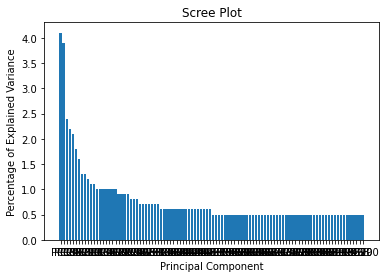

In [34]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(50,len(per_var)+50), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### Logistic Regression - Less than 6 years of survival

In [35]:
log_model0 = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model0.fit(X0_train, Y0_train)
log_model0_predict = log_model0.predict(X0_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_model0.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.24


In [36]:
#Confusion Metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y0_test, log_model0_predict)
print(confusion_matrix)
#Precision, Recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(Y0_test, log_model0_predict))

[[ 593  833  177   86   64  110]
 [ 291 3795  665  447  352  515]
 [ 168 3296  712  409  362  617]
 [ 125 2876  652  439  383  604]
 [  78 2505  621  419  401  624]
 [  61 2280  582  353  340  648]]
              precision    recall  f1-score   support

         1.0       0.45      0.32      0.37      1863
         2.0       0.24      0.63      0.35      6065
         3.0       0.21      0.13      0.16      5564
         4.0       0.20      0.09      0.12      5079
         5.0       0.21      0.09      0.12      4648
         6.0       0.21      0.15      0.18      4264

    accuracy                           0.24     27483
   macro avg       0.25      0.23      0.22     27483
weighted avg       0.23      0.24      0.21     27483



### PCA for Logistic Regression- More than 6 Years of Survival

In [37]:
#linear regression for less than 6 years
data_1 = cancer_data_regression_final[cancer_data_regression_final['Survival_category'] == '1']
#uncomment code below to look at dataset
#data_1.head(10)

In [38]:
# Preparation for models
# We first need to split our dataset into training and testing (X1 and Y1)
X1=data_1.drop(columns=['SRV_TIME_YR'])
Y1=data_1['SRV_TIME_YR']
X1_train, X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size =0.2, random_state =0)

#standarizing the data for PCA Analsyis
scaler=StandardScaler()
#fitting the on training set only
scaler.fit(X1_train)
#apply transformation to both training set and the test set
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)
#Please uncomment code below to see what the scaler transformation does
X1_train

array([[ 0.        , -0.76873588,  0.76873588, ..., -0.02335113,
        -1.44305965,  1.44305965],
       [ 0.        , -0.76873588,  0.76873588, ..., -0.02335113,
         0.69297205, -0.69297205],
       [ 0.        ,  1.3008369 , -1.3008369 , ..., -0.02335113,
         0.69297205, -0.69297205],
       ...,
       [ 0.        ,  1.3008369 , -1.3008369 , ..., -0.02335113,
         0.69297205, -0.69297205],
       [ 0.        ,  1.3008369 , -1.3008369 , ..., -0.02335113,
         0.69297205, -0.69297205],
       [ 0.        , -0.76873588,  0.76873588, ..., -0.02335113,
         0.69297205, -0.69297205]])

In [39]:
#PCA Analysis
#Make an instance of the Model- fitting it ONLY on training set
pca = PCA(n_components = 100)
pca.fit(X1_train)
#Applying the PCA transforming to both training set and test set
X1_train = pca.transform(X1_train)
X1_test = pca.transform(X1_test)
X1_train.shape

(56883, 100)

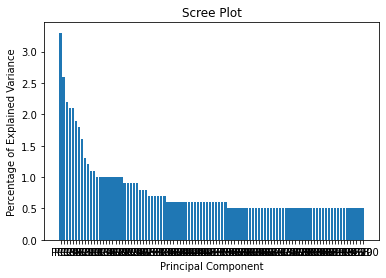

In [40]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(50,len(per_var)+50), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### Logistic Regression- More than 6 years of survivial

In [41]:
log_model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model1.fit(X1_train, Y1_train)
log_model1_predict = log_model1.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_model1.score(X1_test, Y1_test)))

Accuracy of logistic regression classifier on test set: 0.52


In [42]:
#Confusion Metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y1_test, log_model1_predict)
print(confusion_matrix)
#Precision, Recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(Y1_test, log_model1_predict))

[[3524  382   81   29]
 [  55 2943  700  236]
 [  21 2380  693  263]
 [  10 2039  601  264]]
              precision    recall  f1-score   support

         7.0       0.98      0.88      0.92      4016
         8.0       0.38      0.75      0.50      3934
         9.0       0.33      0.21      0.26      3357
        10.0       0.33      0.09      0.14      2914

    accuracy                           0.52     14221
   macro avg       0.51      0.48      0.46     14221
weighted avg       0.53      0.52      0.49     14221



# Bayesian Network

In [16]:
# We start by reading the extracted csv file that has all the variables deemed necessary to answer our question.
cancer_data_Bayesian = pd.read_csv('breast_cancer_completeV1.csv')
#please uncomment this line of code to view the original dataset
#cancer_data_Bayesian

In [17]:
# We drop any rows with no values
cancer_data_Bayesian.dropna(inplace=True)

#removing male gender because negligeable representation
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['SEX'] == 1].index, inplace = True)
#removing sex column because only 1 value there now
cancer_data_Bayesian = cancer_data_Bayesian.drop(['SEX'], axis='columns')

#reformate no_surg column to boolean or surgery (0) or no surgery (1)
cancer_data_Bayesian["NO_SURG"].replace({1: 1, 2: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, inplace=True)

#drop rows with unkown age =99 and drop under 30 
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['AGE_1REC'] < 7].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['AGE_1REC'] == 99].index, inplace = True)

#combine other group for rac_reca and add unkown to other
cancer_data_Bayesian["RAC_RECA"].replace({7: 2, 9: 2, 3: 2}, inplace=True)

#combine marital stauts to has a partner or single
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['MAR_STAT'] == 9].index, inplace = True)
cancer_data_Bayesian["MAR_STAT"].replace({3: 1, 4: 1, 5: 1, 6: 2}, inplace=True)

#get rid of any rows that are not alive or dead because of breast cancer
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50300].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50130].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 27030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50080].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50160].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50050].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 37000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 22030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 27040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50210].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50051].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50120].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21100].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35021].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50100].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50150].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21050].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 31010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 29020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21130].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 23000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50070].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 29010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 27010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 38000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 32020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 34000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21080].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 41000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 33040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 22020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21072].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 29030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50220].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35011].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50200].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50180].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 33010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 30000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 25010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 20050].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50140].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21071].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50170].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 24000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35043].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 27070].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 27050].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 27060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35012].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21110].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35031].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35023].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 25020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 20070].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35013].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 29040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 20030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 20080].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 28010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 20040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50190].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21120].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50230].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21090].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 27020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 21010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 20060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35022].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 20100].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 32010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 22010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50110].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 20020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 35041].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 50090].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUB'] == 22060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50300].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50130].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 27030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50080].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50160].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50050].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 37000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 22030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 27040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50210].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50051].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50120].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21100].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35021].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50100].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50150].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21050].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 31010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 29020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21130].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 23000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50070].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 29010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 27010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 38000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 32020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 34000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21080].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 41000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 33040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 22020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21072].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 29030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50220].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35011].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50200].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50180].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 33010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 30000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 25010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 20050].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50140].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21071].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50170].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 24000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35043].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 27070].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 27050].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 27060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35012].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21110].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35031].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35023].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 25020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 20070].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35013].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 29040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 20030].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 20080].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 28010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 20040].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50190].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21120].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50230].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21090].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 27020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 21010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 20060].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35022].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 20100].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 32010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 22010].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50110].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50000].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 20020].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 35041].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 50090].index, inplace = True)
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['CODPUBKM'] == 22060].index, inplace = True)
cancer_data_Bayesian = cancer_data_Bayesian.drop(['CODPUB'], axis='columns')
cancer_data_Bayesian = cancer_data_Bayesian.drop(['CODPUBKM'], axis='columns')

#drop unkown survival time
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['SRV_TIME_MON'] == 9999].index, inplace = True)

#group insured and insured/no specifics
cancer_data_Bayesian["INSREC_PUB"].replace({4: 3}, inplace=True)

#get rid of rows with unkown stage in ADJAJCCSTG
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['ADJAJCCSTG'] == 99].index, inplace = True)

#get rid of rows with unkown tumor counts MALIGCOUNT
cancer_data_Bayesian.drop(cancer_data_Bayesian[cancer_data_Bayesian['MALIGCOUNT'] == 99].index, inplace = True)

#coverting SRV_TIME_MON into Years "SRV_TIME_YR"
cancer_data_Bayesian["SRV_TIME_YR"] = cancer_data_Bayesian["SRV_TIME_MON"] / 12
cancer_data_Bayesian['SRV_TIME_YR'] = cancer_data_Bayesian['SRV_TIME_YR'].apply(np.ceil)

#drop the survival time in months as it is no longer relevant
cancer_data_Bayesian = cancer_data_Bayesian.drop(['SRV_TIME_MON'], axis='columns')

#we finaly only keep the following variables as we are trying to get a better understadning of Bayesian networks
#and want to reduce the complexity we face
bn_cancer_data = cancer_data_Bayesian[["SRV_TIME_YR", "NO_SURG", "RADIATION", "RAD_SURG_SEQ", "CHEMO"]]

In [18]:
#we set up the structure and edges of our model based on our understanding.
#it would be better to have a subject expert decide these structures.
sm_cancer = StructureModel()

sm_cancer.add_edges_from([
    ('NO_SURG', 'SRV_TIME_YR'),
    ('RADIATION', 'SRV_TIME_YR'),
    ('RAD_SURG_SEQ', 'SRV_TIME_YR'),
    ('CHEMO', 'SRV_TIME_YR'),
    ('RADIATION', 'RAD_SURG_SEQ'),
    ('NO_SURG', 'RAD_SURG_SEQ')
])

In [19]:
# We need to split our dataset into training and testing
train, test = train_test_split(bn_cancer_data, train_size = 0.8, random_state=42)

In [20]:
#we fit our model
bn_cancer = BayesianNetwork(sm_cancer)
bn_cancer = bn_cancer.fit_node_states(bn_cancer_data)
bn_cancer = bn_cancer.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

C:\Users\fadyn\AppData\Roaming\Python\Python38\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  warnings.warn(


In [21]:
#check auc to make sure the results aren't horrible
roc, auc = roc_auc(bn_cancer, test, "SRV_TIME_YR")
print(auc)

0.6041227345259322


In [22]:
#call cpds for survival time in years to see how different treatment methods affect its probability
cond_prob_dist = bn_cancer.cpds['SRV_TIME_YR']
cond_prob_dist

CHEMO              0.0                                                    \
NO_SURG              0                                                     
RADIATION          0.0                                                     
RAD_SURG_SEQ       0.0       2.0       3.0       4.0       5.0       6.0   
SRV_TIME_YR                                                                
0.0           0.000924  0.090909  0.071429  0.090909  0.090909  0.090909   
1.0           0.028819  0.090909  0.071429  0.090909  0.090909  0.090909   
2.0           0.134185  0.090909  0.071429  0.090909  0.090909  0.090909   
3.0           0.127382  0.090909  0.142857  0.090909  0.090909  0.090909   
4.0           0.124702  0.090909  0.142857  0.090909  0.090909  0.090909   
5.0           0.114461  0.090909  0.142857  0.090909  0.090909  0.090909   
6.0           0.105662  0.090909  0.071429  0.090909  0.090909  0.090909   
7.0           0.099728  0.090909  0.071429  0.090909  0.090909  0.090909   
8.0           0.099137  0.090909  0.071429  0.090909  0.090909  0.090909   
9.0           0.089543  0.090909  0.071429  0.090909  0.090909  0.090909   
10.0          0.075457  0.090909  0.071429  0.090909  0.090909  0.090909   

CHEMO                                                 ...       1.0            \
NO_SURG                                               ...         1             
RADIATION                              1.0            ...       7.0             
RAD_SURG_SEQ       7.0       9.0       0.0       2.0  ...       7.0       9.0   
SRV_TIME_YR                                           ...                       
0.0           0.090909  0.083333  0.001441  0.004762  ...  0.090909  0.090909   
1.0           0.090909  0.083333  0.031700  0.033333  ...  0.090909  0.090909   
2.0           0.090909  0.083333  0.146974  0.133333  ...  0.090909  0.090909   
3.0           0.090909  0.083333  0.142651  0.119048  ...  0.090909  0.090909   
4.0           0.090909  0.166667  0.145533  0.080952  ...  0.090909  0.090909   
5.0           0.090909  0.083333  0.108069  0.100000  ...  0.090909  0.090909   
6.0           0.090909  0.083333  0.108069  0.109524  ...  0.090909  0.090909   
7.0           0.090909  0.083333  0.083573  0.100000  ...  0.090909  0.090909   
8.0           0.090909  0.083333  0.083573  0.109524  ...  0.090909  0.090909   
9.0           0.090909  0.083333  0.073487  0.080952  ...  0.090909  0.090909   
10.0          0.090909  0.083333  0.074928  0.128571  ...  0.090909  0.090909   

CHEMO                                                                  \
NO_SURG                                                                 
RADIATION       8.0                                                     
RAD_SURG_SEQ    0.0       2.0       3.0       4.0       5.0       6.0   
SRV_TIME_YR                                                             
0.0           0.040  0.090909  0.090909  0.090909  0.090909  0.090909   
1.0           0.192  0.090909  0.090909  0.090909  0.090909  0.090909   
2.0           0.144  0.090909  0.090909  0.090909  0.090909  0.090909   
3.0           0.104  0.090909  0.090909  0.090909  0.090909  0.090909   
4.0           0.176  0.090909  0.090909  0.090909  0.090909  0.090909   
5.0           0.120  0.090909  0.090909  0.090909  0.090909  0.090909   
6.0           0.048  0.090909  0.090909  0.090909  0.090909  0.090909   
7.0           0.072  0.090909  0.090909  0.090909  0.090909  0.090909   
8.0           0.040  0.090909  0.090909  0.090909  0.090909  0.090909   
9.0           0.024  0.090909  0.090909  0.090909  0.090909  0.090909   
10.0          0.040  0.090909  0.090909  0.090909  0.090909  0.090909   

CHEMO                             
NO_SURG                           
RADIATION                         
RAD_SURG_SEQ       7.0       9.0  
SRV_TIME_YR                       
0.0           0.090909  0.090909  
1.0           0.090909  0.090909  
2.0           0.090909  0.090909  
3.0           0.090909  0.090909  
4.

In [23]:
#use inferences to check specific cpds
ie = InferenceEngine(bn_cancer)
#here we check cpds for a patient with the treatment combination: had chemotherapy, did not have a surgery, had Beam radiation.
ie.query({'CHEMO': 1, 'NO_SURG': 1, 'RADIATION': 1, 'RAD_SURG_SEQ': 0})['SRV_TIME_YR']

{0.0: 0.053763440860215075,
 1.0: 0.23655913978494633,
 2.0: 0.2150537634408603,
 3.0: 0.12903225806451615,
 4.0: 0.0752688172043011,
 5.0: 0.09677419354838714,
 6.0: 0.04301075268817206,
 7.0: 0.03225806451612904,
 8.0: 0.04301075268817206,
 9.0: 0.04301075268817206,
 10.0: 0.03225806451612904}